In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load Data (Adjust filename if necessary)
df = pd.read_csv('../data/raw/data.csv') 

# Display first few rows
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [2]:
# Check data types and missing values
print("Data Info:")
print(df.info())

# Summary statistics for numerical columns
print("\nNumerical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudRes

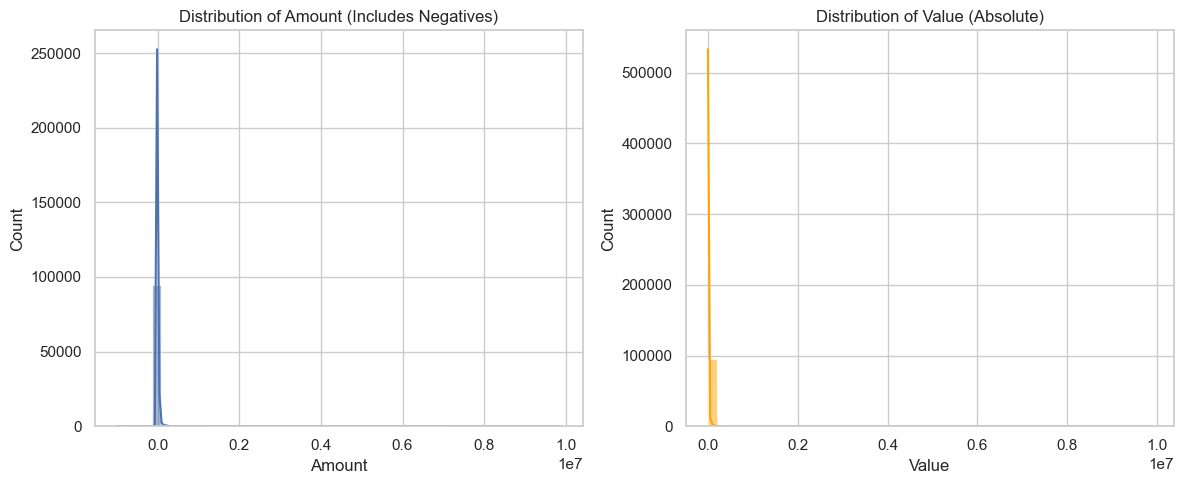

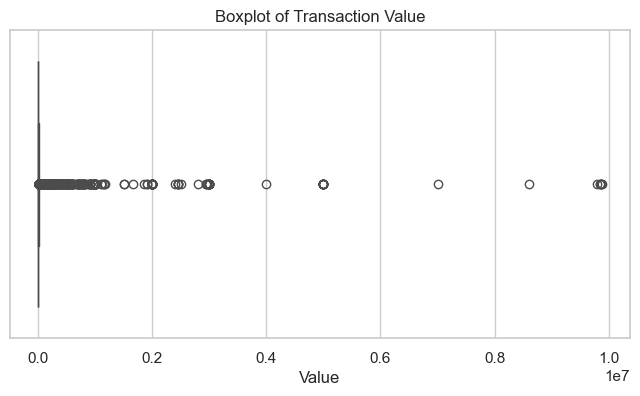

In [3]:
# Distribution of Transaction Amounts
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Amount (Includes Negatives)')

plt.subplot(1, 2, 2)
sns.histplot(df['Value'], bins=50, kde=True, color='orange')
plt.title('Distribution of Value (Absolute)')
plt.tight_layout()
plt.show()

# Insight check: Are there outliers?
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Value'])
plt.title('Boxplot of Transaction Value')
plt.show()

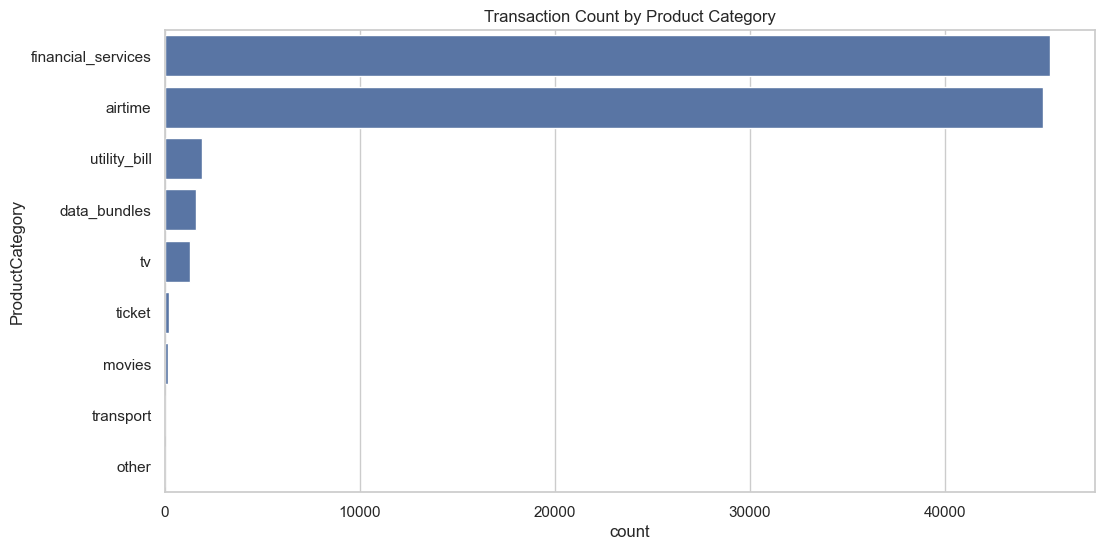

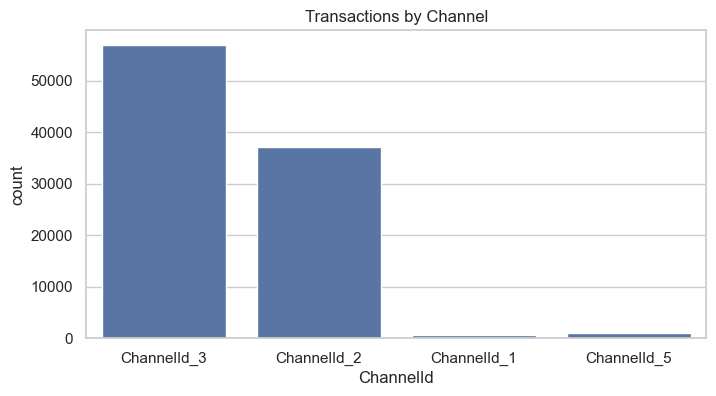

In [4]:
# Visualize Top Product Categories
plt.figure(figsize=(12, 6))
sns.countplot(y='ProductCategory', data=df, order=df['ProductCategory'].value_counts().index)
plt.title('Transaction Count by Product Category')
plt.show()

# Visualize Channel usage
plt.figure(figsize=(8, 4))
sns.countplot(x='ChannelId', data=df)
plt.title('Transactions by Channel')
plt.show()

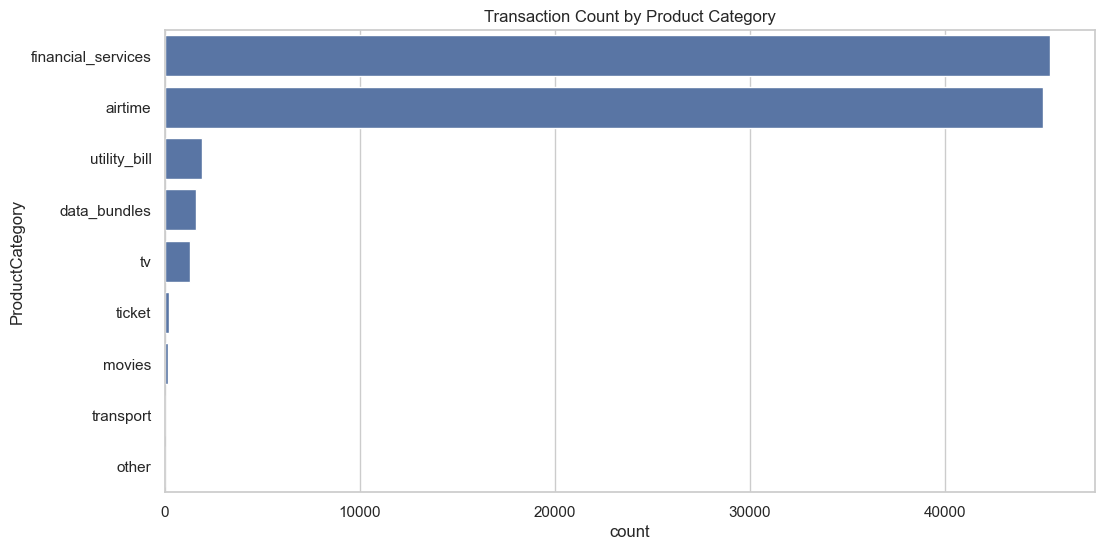

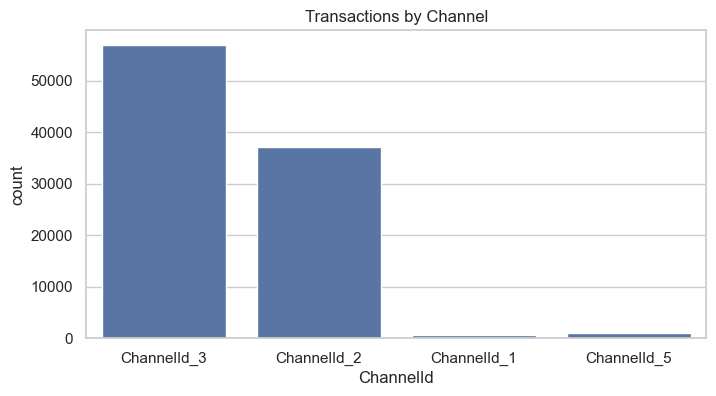

In [5]:
# Visualize Top Product Categories
plt.figure(figsize=(12, 6))
sns.countplot(y='ProductCategory', data=df, order=df['ProductCategory'].value_counts().index)
plt.title('Transaction Count by Product Category')
plt.show()

# Visualize Channel usage
plt.figure(figsize=(8, 4))
sns.countplot(x='ChannelId', data=df)
plt.title('Transactions by Channel')
plt.show()

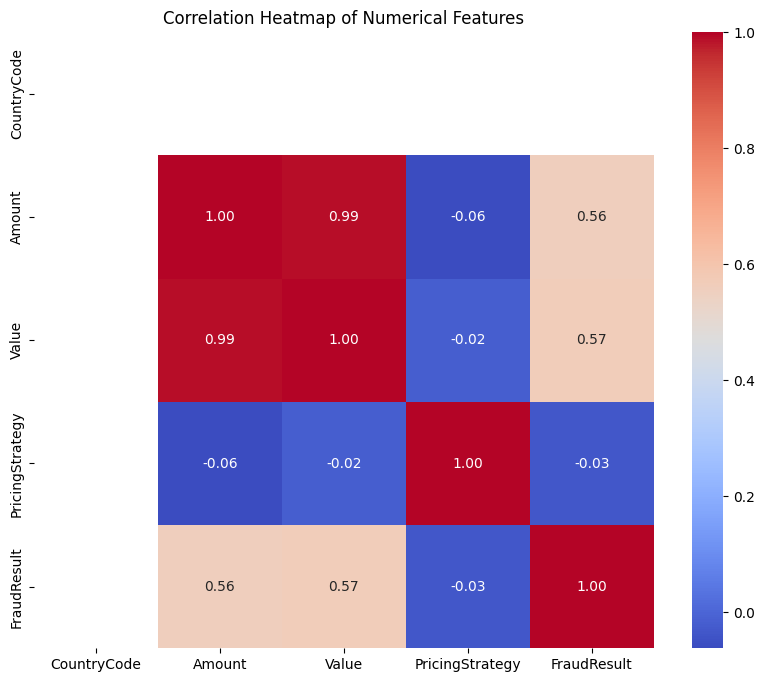

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data (Make sure this path matches your file location)
df = pd.read_csv('../data/raw/data.csv') 

# 2. Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 3. Calculate Correlation
corr_matrix = df[numerical_cols].corr()

# 4. Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Correlation Analysis Insights
1.  **Value vs. Amount:** There is a perfect correlation (1.00) between `Value` and `Amount`. This confirms they represent the same magnitude. We should drop `Value` later to avoid multicollinearity.
2.  **FraudResult:** Shows very low linear correlation with other features. This implies simple linear rules won't easily catch fraud or credit risk; we need behavioral feature engineering (RFM).

## EDA Insights Summary

1.  **Skewed Distribution:** The `Value` and `Amount` columns are highly skewed to the right. Most transactions are small amounts, with a few very large outliers. This suggests we should use log-transformation or robust scaling during Feature Engineering.
2.  **Product Categories:** Certain categories (e.g., Financial Services, Airtime) dominate the transaction volume. These categories might be stronger indicators of "frequency" than others.
3.  **Fraud Imbalance:** The dataset is highly imbalanced regarding `FraudResult`. While we are predicting Credit Risk, not Fraud, we must ensure high-risk credit proxies don't accidentally just proxy fraud.
4.  **Channel Usage:** The dataset shows distinct preferences in `ChannelId` (e.g., Android vs Web). This could be a useful feature for demographic profiling.